In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
corpus_raw = "He is the king . The king is royal . She is the royal queen"

In [ ]:
raw_sentence = corpus_raw.split(".")
sentences = []
for sentence in raw_sentence: # split한 3개의 문장이 나옴
    sentences.append(sentence.strip().split()) # 앞뒤 공백을 없애고 띄어쓰기 기준으로 문장을 tokenize

In [ ]:
sentences

[['He', 'is', 'the', 'king'],
 ['The', 'king', 'is', 'royal'],
 ['She', 'is', 'the', 'royal', 'queen']]

In [ ]:
data = []
WINDOW_SIZE = 2
"""
sentences
[['He', 'is', 'the', 'king'], => sentence[0]
 ['The', 'king', 'is', 'royal'],=>sentence[1]
 ['She', 'is', 'the', 'royal', 'queen']]=>sentence[2]

 만들고자 하는 것 [중심단어, 주변단어] => training sample만들기
"""

for sentence in sentences:
    for word_index, word in enumerate(sentence): # 0 , 0에 대한 단어 식으로 나옴
        start_index = max(word_index - WINDOW_SIZE, 0) # 그냥 해버리면 값이 -가 나올수 있음 => max를 씀 0보다 작은 값들은 그냥 0으로 나와버리도록 함
        end_index = min(word_index + WINDOW_SIZE + 1, len(sentence) )  # window 바깥으로 나가면 안되기 때문에 len으로 최소값을 정해주고 min 함수를 씀
                                                                                        # list indexing 때문에 +1
        for nb_word in sentence[start_index: word_index]:
            data.append([word, nb_word]) # 주변단어

        for nb_word in sentence[word_index +1 : end_index]:
            data.append([word, nb_word])


In [ ]:
data

[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [ ]:
words = []
"""
corpus_raw = "He is the king . The king is royal . She is the royal queen"
"""
for word in corpus_raw.split():
    if word != ".":
        words.append(word)

words = set(words)

word2int = {}
int2word = {}
vocab_size = len(words)

"""
words
{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}

"""
for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print(word2int)
print(int2word)

{'royal': 0, 'the': 1, 'He': 2, 'queen': 3, 'is': 4, 'king': 5, 'She': 6, 'The': 7}
{0: 'royal', 1: 'the', 2: 'He', 3: 'queen', 4: 'is', 5: 'king', 6: 'She', 7: 'The'}


In [ ]:
words

{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}

In [ ]:
def to_one_hot(word_index, vocab_size): # one_hot_encoder
    temp = np.zeros(vocab_size)
    temp[word_index] = 1
    return temp


In [ ]:
x_train, y_train = [], []
"""
data
[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]
"""
for words in data:
    x_train.append(to_one_hot(word2int[words[0]], vocab_size)) # word[0]='He' -> 'He' : 0
    y_train.append(to_one_hot(word2int[words[1]], vocab_size))# word[1]='is' -> 'is': 2
"""
words
{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}
#######################################
vocab_size = len(words)
"""

"\nwords\n{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}\n#######################################\nvocab_size = len(words)\n"

In [ ]:
x_train[:3]

[array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.])]

In [ ]:
x_train = np.asarray(x_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
x_train
y_train

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 

In [ ]:
class Word2Vec:
    def __init__(self, vocab_size=10, embedding_dim=5, optimizer='sgd', epochs=1000, learning_rate=0.01): # 5차원의 dense_vector를 만들기 위해 embedding_dim=5로 줌
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim # dense_vector를 만든다는 것은 가중치를 만들겠다는 것

        if optimizer == "adam":
            self.optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        else:
            self.optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

        self.epochs = epochs
        # W와 b 를 초기화 ; random함수 이용
        self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim])) # normal 입력값으로 차원을 줌(V x M) , V : self.vocab_size, M : self.embedding_dim
        self.b1 = tf.Variable(tf.random.normal([self.embedding_dim]))
        
        self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
        self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))

    def vectorized(self, word_index):
        return (self.W1 + self.b1)[word_index] # self.embedding_dim 만큼의 차원을 가진 vector ; self.W1과 self.b1은  broadcasting 되면서 더해짐

    def train(self, x_train, y_train):
        for i in range(self.epochs):
            with tf.GradientTape() as tape:
                hidden_layer = tf.add(tf.matmul(x_train, self.W1), self.b1)
                output_layer = tf.add(tf.matmul(hidden_layer, self.W2), self.b2)

                pred = tf.nn.softmax(output_layer) # tensor임
                loss = tf.reduce_mean(-tf.math.reduce_sum(y_train * tf.math.log(pred) , axis=[1])) # 행끼리 곱해주기 위해 axis=1

                grads = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2]) # loss에 대해 list에 있는 값들의 미분 값들이 나옴 이것을 업데이트
                self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2] ))

            if i % 1000 == 0 :
                print(loss)




    

In [ ]:
w2v = Word2Vec(vocab_size=vocab_size, embedding_dim=5, optimizer='SGD', epochs=10000, learning_rate=0.1)
w2v.train(x_train, y_train)

tf.Tensor(2.840667, shape=(), dtype=float32)
tf.Tensor(1.3966614, shape=(), dtype=float32)
tf.Tensor(1.3799087, shape=(), dtype=float32)
tf.Tensor(1.3771857, shape=(), dtype=float32)
tf.Tensor(1.3761451, shape=(), dtype=float32)
tf.Tensor(1.3756068, shape=(), dtype=float32)
tf.Tensor(1.375281, shape=(), dtype=float32)
tf.Tensor(1.3750643, shape=(), dtype=float32)
tf.Tensor(1.3749101, shape=(), dtype=float32)
tf.Tensor(1.3747954, shape=(), dtype=float32)


In [ ]:
word2int

{'He': 2,
 'She': 6,
 'The': 7,
 'is': 4,
 'king': 5,
 'queen': 3,
 'royal': 0,
 'the': 1}

In [ ]:
w2v.vectorized(word2int['queen']).numpy() # 8차원에서 5차원으로 줄어듦

array([ 0.62762326, -1.822459  ,  2.3027205 ,  1.4717731 , -0.2669934 ],
      dtype=float32)

In [ ]:
w2v.vectorized(word2int['king']).numpy()

array([ 1.1050036 , -2.1394396 ,  0.36945337, -1.5482979 , -0.30144614],
      dtype=float32)

In [ ]:
vector = w2v.W1 + w2v.b1
vector

<tf.Tensor: shape=(8, 5), dtype=float32, numpy=
array([[-0.15388423,  1.0018041 ,  1.619334  , -0.22089875, -2.2971835 ],
       [-3.2177756 , -1.3139093 ,  0.4436227 ,  0.25842103,  0.20994544],
       [ 0.0675945 , -0.63740927, -1.7129909 ,  0.35494706, -3.2484293 ],
       [ 0.62762326, -1.822459  ,  2.3027205 ,  1.4717731 , -0.2669934 ],
       [ 0.92954445,  0.24248499, -1.3409184 ,  1.1800078 ,  0.9037218 ],
       [ 1.1050036 , -2.1394396 ,  0.36945337, -1.5482979 , -0.30144614],
       [ 0.65846395, -2.4838068 , -0.08027659, -0.54358494, -2.3328094 ],
       [-0.8195634 ,  0.74453694, -1.953512  , -1.6755732 , -1.0145922 ]],
      dtype=float32)>

In [ ]:


from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vector)

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors,'l2')


queen [-0.24413551  0.9697411 ]
royal [ 0.787192   -0.61670804]


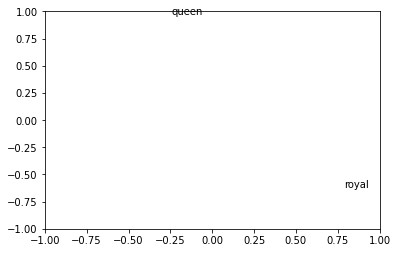

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom =-1, top=1)
for word in words:
    print(word, vectors[word2int[word]])
    ax.annotate(word, (vectors[word2int[word]][0], vectors[word2int[word]][1]))

plt.show()

In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 87 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
 cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 448 kB 40.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-21 01:30:59--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::34cc:ea4a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=L2V%2F8piVytZcS%2Fn5IXkDEsR5ruM%

In [ ]:
import pandas as pd
df_news = pd.read_csv('/content/drive/MyDrive/news.csv')

In [ ]:
df_news

,date,media,title,content,ngrams
0,2005-01-01,연합인포맥스,내년 美국채수익률 5% 넘어서기 어려울 듯,2005년 10년만기 미국 국채수익률이 연방준비제도이사회(FRB)의 금리인상 지속...,"만기/NNG,국채/NNG,수익률/NNG,fed/NNG,fed/NNG,금리/NNG,인..."
1,2005-01-01,연합인포맥스,[뉴욕채권-마감] 10년만기 국채수익률 작년보다 낮은 수준서 마쳐,2년만기 국채가격 4년래 최악의 한해 보내 10년만기 미국 국채수익률이 ...,"만기/NNG,국채/NNG,가격/NNG,최악/NNG,보내/VV,만기/NNG,국채/NN..."
2,2005-01-01,연합인포맥스,[뉴욕환시] `내년초 달러-엔에 주력'..달러 對엔 하락,2004년 마지막 거래일인 31일 뉴욕환시에서 미국 달러화는 개장초 102엔 근처...,"마지막/NNG,거래일/NNG,뉴욕/NNG,환시/NNG,달러/NNG,개장/NNG,근처..."
3,2005-01-01,연합인포맥스,[31일 뉴욕금융시장 요약] 한산한 거래속 새해 준비,) 한해 마지막 날인 31일 뉴욕 주요 금융시장은 한산한 거래속에 새해를 준비하는 ...,"마지막/NNG,뉴욕/NNG,금융시장/NNG,한산/NNG,거래/NNG,새해/NNG,준..."
4,2005-01-02,연합인포맥스,美 증시 기술주 주도로 2년 연속 상승..'01년래 최고,지난해 뉴욕증시는 기술주 주도로 2년 연속연초 대비 상승하면서 대표지수들을 지난 ...,"주도/NNG,연속/NNG,대비/NNG,상승/NNG,대표지수/NNG,최고/NNG,오르..."
...,...,...,...,...,...
261812,2019-12-31,이데일리,'안심대출 여파' 예금은행 대출금리 3.18%…1996년 편제 이후 최저,한국은행 11월중 금융기관 가중평균금리주택담보대출도 0.05%p 내린 2.45%로 ...,"금융기관/NNG,금리/NNG,주택담보대출/NNG,내리/VV,역대/NNG,최저/NNG..."
261813,2019-12-31,이데일리,이주열 “양적 확대로 성장동력 창출 어려워…혁신성장해야”,이주열 한국은행 총재 신년사(사진=연합뉴스)[이데일리 김경은 기자] 이주열(사진) ...,"신년사/NNG,가장/MAG,주력/NNG,과제/NNG,혁신성장/NNG,동력/NNG,확..."
261814,2019-12-31,이데일리,"""내년 세계경제 우상향…유가·금리 환경 든든""",KB증권 보고서[이데일리 전재욱 기자] KB증권은 내년 세계 경제가 미·중 무역분쟁...,"보고서/NNG,세계/NNG,경제/NNG,무역/NNG,분쟁/NNG,소강/NNG,통화정..."
261815,2019-12-31,이데일리,"금융권 쥐띠 리더들…""어려운 환경에도 새로운 기회 만들것""",은행권서 농협 이대훈·수협 이동빈 행장 대표적카드 '빅3' CEO 모두 쥐띠..삼성...,"농협/NNG,수협/NNG,이동/NNG,행장/NNG,카드/NNG,쥐띠/NNG,금융/N..."


In [ ]:
df_news.shape

(261817, 5)

In [ ]:
df_news['content'][0]

'2005년 10년만기 미국 국채수익률이  연방준비제도이사회(FRB)의 금리인상 지속에 따른 인플레이션 압력 완화로 연 5%를 넘어서기 어려울 것으로 전망됐다.    31일 씨티그룹 애널리스트들은 2005년에 미국의 인플레가 잘 제어될 것이라면서반면 내년 2년만기 국채수익률은 FRB의 지속적인 금리인상으로 연 4.00-4.50%  수준까지 상승하게 될 것이라고 예측했다.    씨티그룹은 단기 국채수익률이 상승세를 나타낼 것으로 보이는 반면 장기  국채수익률의 상승폭은 제한될 것으로 보여 수익률 곡선 평탄화가 가속화될 것이라고 덧붙였다.    씨티그룹은 내년 고용창출 호조가 가구당 수입증가를 견인할 것이라면서 고용시장 호전이 소비자지출을 떠받치게 될 것이라고 말했다'

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

corpus = [mecab.morphs(sent) for para in sentences for sent in para]


In [ ]:
len(corpus)

261817

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(
                sentences=sentences, 
                 vector_size=100, 
                 alpha=0.025,
                 window=5, 
                 min_count=2, 
                 workers=4,
                 sg=1,
                 sample=0.001
                 )


In [ ]:
word_embedding = model.wv